# Time Series Analysis PyCon 2017 by Aileen Nielsen

Covers basic techniques. Taking some notes and exploring a few things. <https://www.youtube.com/watch?v=zmfe2RaX-14>

In [3]:
# imports
import pandas as pd
from pytz import common_timezones, all_timezones
import numpy as np
import matplotlib.pyplot as plt

## Basics

Generate a series of time stamps using `date_range`:

In [2]:
rng = pd.date_range("2020 Aug 9 17:15", periods=10, freq="M")
rng

DatetimeIndex(['2020-08-31 17:15:00', '2020-09-30 17:15:00',
               '2020-10-31 17:15:00', '2020-11-30 17:15:00',
               '2020-12-31 17:15:00', '2021-01-31 17:15:00',
               '2021-02-28 17:15:00', '2021-03-31 17:15:00',
               '2021-04-30 17:15:00', '2021-05-31 17:15:00'],
              dtype='datetime64[ns]', freq='M')

`Timestamp` uses US-style data format (`mm/dd/yyyy`):

In [3]:
pd.Timestamp("2020-08-17")

Timestamp('2020-08-17 00:00:00')

Down to nanosecond precision (even though only the first six decimal places are displayed):

In [4]:
pd.Timestamp("2020-08-17 17:15:08.156")

Timestamp('2020-08-17 17:15:08.156000')

Timestamps can tell us what quarter, day of the week, etc. they belong to:

In [5]:
ts1 = pd.Timestamp("2020-08-23 17:15:08.156")
print(f"quarter of ts1: {ts1.quarter}")
print(f"day of week of ts1: {ts1.dayofweek}")
print(f"name of day of ts1: {ts1.day_name()}")

quarter of ts1: 3
day of week of ts1: 6
name of day of ts1: Sunday


Time offsets. For example, one day and one microsecond:

In [6]:
pd.Timedelta("1 day 1us")

Timedelta('1 days 00:00:00.000001')

Add an hour and a half to a time stamp:

In [7]:
pd.Timestamp("2018-08-17 22:00") + pd.Timedelta("1.5 hours")

Timestamp('2018-08-17 23:30:00')

Time spans (called `Period`). Check if a time stamp is within a time period:

In [8]:
p = pd.Period("2020-08")
t = pd.Timestamp("2020-08-18")
print(f"p start time: {p.start_time}")
print(f"p end time: {p.end_time}")
print(f"period: {p}")
print(f"ts: {t}")
p.start_time < t and p.end_time > t

p start time: 2020-08-01 00:00:00
p end time: 2020-08-31 23:59:59.999999999
period: 2020-08
ts: 2020-08-18 00:00:00


True

Generate a range of time periods. Looks like a timestamp, but not its type, which is an hourly period.

In [9]:
p_rng = pd.period_range("2020-01-01 12:15", freq="H", periods=10)
p_rng

PeriodIndex(['2020-01-01 12:00', '2020-01-01 13:00', '2020-01-01 14:00',
             '2020-01-01 15:00', '2020-01-01 16:00', '2020-01-01 17:00',
             '2020-01-01 18:00', '2020-01-01 19:00', '2020-01-01 20:00',
             '2020-01-01 21:00'],
            dtype='period[H]', freq='H')

Minutely:

In [90]:
p_rng = pd.period_range("2020-01-01 12:15", freq="60T", periods=10)
p_rng

PeriodIndex(['2020-01-01 12:15', '2020-01-01 13:15', '2020-01-01 14:15',
             '2020-01-01 15:15', '2020-01-01 16:15', '2020-01-01 17:15',
             '2020-01-01 18:15', '2020-01-01 19:15', '2020-01-01 20:15',
             '2020-01-01 21:15'],
            dtype='period[60T]', freq='60T')

Check if two time stamps are within a given period range:

In [14]:
p = pd.Period("2020-08-15 12:15")
t_1 = pd.Timestamp("2020-08-15 12:25")
t_2 = pd.Timestamp("2020-08-15 12:15:33")
print(f"p.start_time: {p.start_time}")
print(f"p.end_time: {p.end_time}")
t_1_in_p = p.start_time < t_1 and p.end_time > t_1
t_2_in_p = p.start_time < t_2 and p.end_time > t_2
print(f"t_1 in p? {t_1_in_p}")
print(f"t_2 in p? {t_2_in_p}")

p.start_time: 2020-08-15 12:15:00
p.end_time: 2020-08-15 12:15:59.999999999
t_1 in p? False
t_2 in p? True


Combining offset aliases in a `date_range`:

In [15]:
pd.date_range("2020-01-01 12:15", freq="1h30min", periods=10)

DatetimeIndex(['2020-01-01 12:15:00', '2020-01-01 13:45:00',
               '2020-01-01 15:15:00', '2020-01-01 16:45:00',
               '2020-01-01 18:15:00', '2020-01-01 19:45:00',
               '2020-01-01 21:15:00', '2020-01-01 22:45:00',
               '2020-01-02 00:15:00', '2020-01-02 01:45:00'],
              dtype='datetime64[ns]', freq='90T')

Create a `Series` indexed by time periods:

In [16]:
num_periods = 10
ts_pd = pd.Series(range(num_periods), pd.period_range("2020-08-01 11:15", freq="60T", periods=num_periods))
ts_pd

2020-08-01 11:15    0
2020-08-01 12:15    1
2020-08-01 13:15    2
2020-08-01 14:15    3
2020-08-01 15:15    4
2020-08-01 16:15    5
2020-08-01 17:15    6
2020-08-01 18:15    7
2020-08-01 19:15    8
2020-08-01 20:15    9
Freq: 60T, dtype: int64

You can then slice the `Series`:

In [17]:
ts_pd["2020-08-01 13":"2020-08-01 17"]

2020-08-01 13:15    2
2020-08-01 14:15    3
2020-08-01 15:15    4
2020-08-01 16:15    5
2020-08-01 17:15    6
Freq: 60T, dtype: int64

A `Series` of indexed by time stamps:

In [18]:
num_periods = 10
ts_dt = pd.Series(range(num_periods), pd.date_range("2020-08-01 11:15", freq="60T", periods=num_periods))
ts_dt

2020-08-01 11:15:00    0
2020-08-01 12:15:00    1
2020-08-01 13:15:00    2
2020-08-01 14:15:00    3
2020-08-01 15:15:00    4
2020-08-01 16:15:00    5
2020-08-01 17:15:00    6
2020-08-01 18:15:00    7
2020-08-01 19:15:00    8
2020-08-01 20:15:00    9
Freq: 60T, dtype: int64

In [19]:
ts_dt["2020-08-01 13":"2020-08-01 17"]

2020-08-01 13:15:00    2
2020-08-01 14:15:00    3
2020-08-01 15:15:00    4
2020-08-01 16:15:00    5
2020-08-01 17:15:00    6
Freq: 60T, dtype: int64

How do you decide whether to use a `date_range` or a `period_range`? "I counted $n$ visitors to my site at time $x$ versus I counted $n$ visitors to my site during time period $x$". I counted at this time and a minute later and again another minute later or I counted all visitors during this month.

You can convert between a `DateTimeIndex` and a `PeriodIndex` using:
```python
ts_dt.to_period()
ts_pd.to_timestamp()
```

## Time zones

Can use `pytz` to get pretty good time zone support, including awareness of DST changes and a fairly up-to-date IANA tz db (at least on Linux and mac OS) and there is also [PEP 615](https://www.python.org/dev/peps/pep-0615/).

List of supported time zones:

In [20]:
print(len(all_timezones))

592


In [21]:
print(all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

By default, Pandas time objects are not time zone aware:

In [22]:
rng = pd.date_range("2020-08-15 00:00", periods=15, freq="d")
rng

DatetimeIndex(['2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18',
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28', '2020-08-29'],
              dtype='datetime64[ns]', freq='D')

In [23]:
print(rng.tz)

None


In [24]:
rng = pd.date_range("2020-08-15 00:00", periods=15, freq="d", tz="Europe/London")
rng

DatetimeIndex(['2020-08-15 00:00:00+01:00', '2020-08-16 00:00:00+01:00',
               '2020-08-17 00:00:00+01:00', '2020-08-18 00:00:00+01:00',
               '2020-08-19 00:00:00+01:00', '2020-08-20 00:00:00+01:00',
               '2020-08-21 00:00:00+01:00', '2020-08-22 00:00:00+01:00',
               '2020-08-23 00:00:00+01:00', '2020-08-24 00:00:00+01:00',
               '2020-08-25 00:00:00+01:00', '2020-08-26 00:00:00+01:00',
               '2020-08-27 00:00:00+01:00', '2020-08-28 00:00:00+01:00',
               '2020-08-29 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/London]', freq='D')

In [25]:
print(rng.tz)

Europe/London


Convert a time zone naive date-time index to a time zone aware one using `Series.tz_localize()`. There is a matching method on `Timestamp`.

In [28]:
rng_naive = pd.date_range("2020-08-15 00:00", periods=15, freq="d")
rng_aware = rng_naive.tz_localize(tz="Europe/Berlin")
rng_aware

DatetimeIndex(['2020-08-15 00:00:00+02:00', '2020-08-16 00:00:00+02:00',
               '2020-08-17 00:00:00+02:00', '2020-08-18 00:00:00+02:00',
               '2020-08-19 00:00:00+02:00', '2020-08-20 00:00:00+02:00',
               '2020-08-21 00:00:00+02:00', '2020-08-22 00:00:00+02:00',
               '2020-08-23 00:00:00+02:00', '2020-08-24 00:00:00+02:00',
               '2020-08-25 00:00:00+02:00', '2020-08-26 00:00:00+02:00',
               '2020-08-27 00:00:00+02:00', '2020-08-28 00:00:00+02:00',
               '2020-08-29 00:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq='D')

If an object already has a time zone associated with it, you can change it using `tz_convert()`:

In [29]:
rng_aware_ny = rng_aware.tz_convert("America/New_York")
rng_aware_ny

DatetimeIndex(['2020-08-14 18:00:00-04:00', '2020-08-15 18:00:00-04:00',
               '2020-08-16 18:00:00-04:00', '2020-08-17 18:00:00-04:00',
               '2020-08-18 18:00:00-04:00', '2020-08-19 18:00:00-04:00',
               '2020-08-20 18:00:00-04:00', '2020-08-21 18:00:00-04:00',
               '2020-08-22 18:00:00-04:00', '2020-08-23 18:00:00-04:00',
               '2020-08-24 18:00:00-04:00', '2020-08-25 18:00:00-04:00',
               '2020-08-26 18:00:00-04:00', '2020-08-27 18:00:00-04:00',
               '2020-08-28 18:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

Takes care of DST changes:

In [30]:
rng = pd.date_range("2020-03-05", periods=10, tz="US/Eastern")
ts = pd.Series(range(10), index=rng)
ts

2020-03-05 00:00:00-05:00    0
2020-03-06 00:00:00-05:00    1
2020-03-07 00:00:00-05:00    2
2020-03-08 00:00:00-05:00    3
2020-03-09 00:00:00-04:00    4
2020-03-10 00:00:00-04:00    5
2020-03-11 00:00:00-04:00    6
2020-03-12 00:00:00-04:00    7
2020-03-13 00:00:00-04:00    8
2020-03-14 00:00:00-04:00    9
Freq: D, dtype: int64

If you do not work in UTC, you might get ambiguous times. This can happen when you track time stamps across a DST change boundary (e.g., the clock falls back by an hour in the time zone and therefore, that time is followed by the same time). For example:

In [31]:
rng_hourly = pd.DatetimeIndex(data=["2011-11-06 00:00", "2011-11-06 01:00", "2011-11-06 01:00", "2011-11-06 02:00"])
rng_hourly

DatetimeIndex(['2011-11-06 00:00:00', '2011-11-06 01:00:00',
               '2011-11-06 01:00:00', '2011-11-06 02:00:00'],
              dtype='datetime64[ns]', freq=None)

In [32]:
rng_hourly.tz_localize("US/Central")

AmbiguousTimeError: Cannot infer dst time from %r, try using the 'ambiguous' argument

We can handle this error by letting Pandas infer how to handle the ambiguous time:

In [33]:
rng_hourly.tz_localize("US/Central", ambiguous="infer")

DatetimeIndex(['2011-11-06 00:00:00-05:00', '2011-11-06 01:00:00-05:00',
               '2011-11-06 01:00:00-06:00', '2011-11-06 02:00:00-06:00'],
              dtype='datetime64[ns, US/Central]', freq=None)

Best to work in UTC whenever possible:

In [112]:
rng_hourly.tz_localize("US/Central", ambiguous="infer").tz_convert("utc")

DatetimeIndex(['2011-11-06 05:00:00+00:00', '2011-11-06 06:00:00+00:00',
               '2011-11-06 07:00:00+00:00', '2011-11-06 08:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Resampling

In [34]:
rng = pd.date_range("2011-01-01", periods=72, freq="H")
#print(len(rng))
#print(range(len(rng)))
#print(list(range(len(rng))))
ts = pd.Series(list(range(len(rng))), index=rng)

In [35]:
ts.head()

2011-01-01 00:00:00    0
2011-01-01 01:00:00    1
2011-01-01 02:00:00    2
2011-01-01 03:00:00    3
2011-01-01 04:00:00    4
Freq: H, dtype: int64

In [36]:

converted_ffill = ts.asfreq("45min", method="ffill")

In [37]:
converted_ffill.head()

2011-01-01 00:00:00    0
2011-01-01 00:45:00    0
2011-01-01 01:30:00    1
2011-01-01 02:15:00    2
2011-01-01 03:00:00    3
Freq: 45T, dtype: int64

In [38]:
converted_bfill = ts.asfreq("45min", method="bfill")

In [39]:
converted_bfill.head()

2011-01-01 00:00:00    0
2011-01-01 00:45:00    1
2011-01-01 01:30:00    2
2011-01-01 02:15:00    3
2011-01-01 03:00:00    3
Freq: 45T, dtype: int64

In [40]:
converted = ts.asfreq("45min")

In [41]:
converted.head()

2011-01-01 00:00:00    0.0
2011-01-01 00:45:00    NaN
2011-01-01 01:30:00    NaN
2011-01-01 02:15:00    NaN
2011-01-01 03:00:00    3.0
Freq: 45T, dtype: float64

The `resample` method is much more powerful than `asfreq`:

In [42]:
ts.resample??

Signature:
ts.resample(
    rule,
    how=None,
    axis=0,
    fill_method=None,
    closed=None,
    label=None,
    convention='start',
    kind=None,
    loffset=None,
    limit=None,
    base=0,
    on=None,
    level=None,
)
Source:   
    def resample(
        self,
        rule,
        how=None,
        axis=0,
        fill_method=None,
        closed=None,
        label=None,
        convention="start",
        kind=None,
        loffset=None,
        limit=None,
        base=0,
        on=None,
        level=None,
    ):
        """
        Resample time-series data.

        Convenience method for frequency conversion and resampling of time
        series. Object must have a datetime-like index (`DatetimeIndex`,
        `PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
        to the `on` or `level` keyword.

        Parameters
        ----------
        rule : DateOffset, Timedelta or str
            The offset string or object representing target conversio

Your time series data can be sampled at irregular intervals, but it needs to be in sorted order for Pandas to be able to resample it.

## Lag and Moving Window Functions 

You can `lag` a time series so as to move the entire time series forward or backward by some time unit. This can be useful to compare time series visually with each other. 

You can apply window functions (e.g., rolling window, expanding window) to smooth the information in your time series. The window moves over the data a few data points at a time and somehow aggregates the data points contained in each window.

### Lag

'Difference' a time series inspecting its lagged representation:

In [43]:
ts = pd.Series(np.random.randn(20) + 10, pd.date_range("2020-07-01", freq="D", periods=20))
ts_lagged = ts.shift()  # will shift all values by one index and lose the last value

In [44]:
ts.head()

2020-07-01     9.239827
2020-07-02    11.051615
2020-07-03     9.540539
2020-07-04     9.108054
2020-07-05    10.566205
Freq: D, dtype: float64

In [45]:
ts_lagged.head()

2020-07-01          NaN
2020-07-02     9.239827
2020-07-03    11.051615
2020-07-04     9.540539
2020-07-05     9.108054
Freq: D, dtype: float64

In [46]:
ts.diff()

2020-07-01         NaN
2020-07-02    1.811788
2020-07-03   -1.511075
2020-07-04   -0.432486
2020-07-05    1.458151
2020-07-06   -1.320233
2020-07-07   -0.012213
2020-07-08    1.035826
2020-07-09   -0.943952
2020-07-10    3.217168
2020-07-11   -2.903761
2020-07-12   -0.571531
2020-07-13    0.260172
2020-07-14    1.096316
2020-07-15   -1.491802
2020-07-16    0.006644
2020-07-17    2.158579
2020-07-18   -1.993692
2020-07-19    1.232696
2020-07-20   -1.547048
Freq: D, dtype: float64

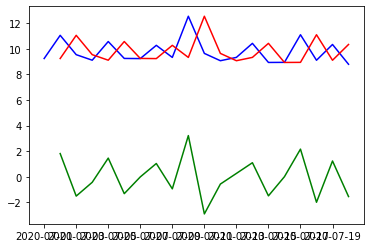

In [47]:
plt.plot(ts, color="blue")
plt.plot(ts_lagged, color="red")
plt.plot(ts - ts_lagged, color="green")

Can also use `ts.diff` in order to compute the difference:

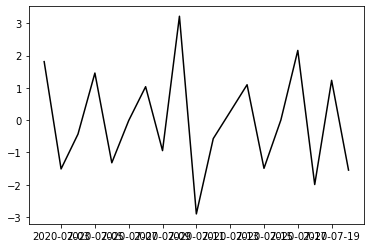

In [48]:
plt.plot(ts.diff(), color="black")

### Window Functions

In [49]:
df = pd.DataFrame(np.random.randn(600, 3), index=pd.date_range("2016-05-01", freq="D", periods=600))

In [50]:
df.head()

,0,1,2
2016-05-01,-1.289925,0.596847,0.872965
2016-05-02,-0.764779,0.568738,0.117517
2016-05-03,0.569180,0.362178,1.196412
2016-05-04,1.139385,-2.051253,-0.432231
2016-05-05,1.331409,-1.076934,-2.035484


This defines a rolling window that you can use to apply operation on.

In [51]:
r = df.rolling(window=20)
r

Rolling [window=20,center=False,axis=0]

Take 20 data points and compute the mean:

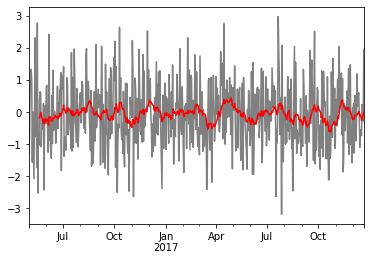

In [52]:
df[0].plot(color="gray")
r.mean()[0].plot(color="red")

Works in the same way for other functions:

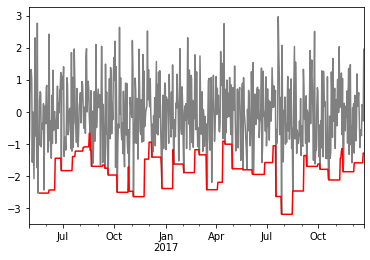

In [53]:
df[0].plot(color="gray")
r.min()[0].plot(color="red")

The bigger you make your window (in terms of data points / observations), the smoother the resulting function will become:

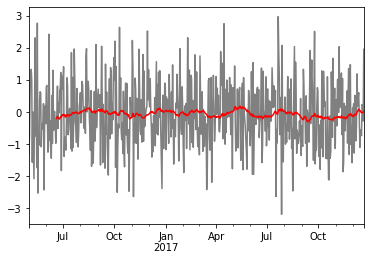

In [54]:
r2 = df.rolling(window=50)
df[0].plot(color="gray")
r2.mean()[0].plot(color="red")

There are many other operations you can call on a rolling window, such as `r.agg`, `r.apply`, `r.count`, `r.max`, `r.median`, `r.name`, `r.quantile`, `r.kurt`, `r.aggregate`, `r.std`, `r.skew`, `r.sum`, `r.var`.

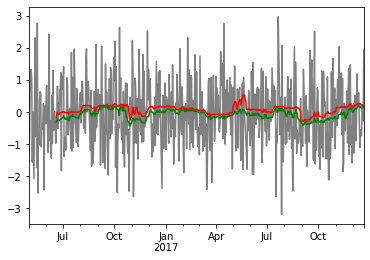

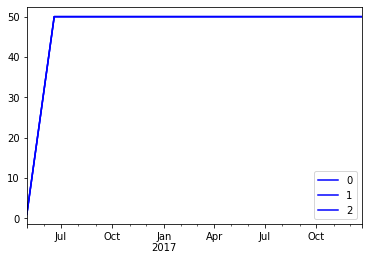

In [55]:
df[0].plot(color="gray")
r2.quantile(0.57)[0].plot(color="red")
r2.median()[0].plot(color="green")
r2.count().plot(color="blue")

Applying a custom function to a rolling window:

In [56]:
df.rolling(window=10, center=False).apply(lambda x: x[1]/x[2])[10:20]

,0,1,2
2016-05-11,0.499550,-0.176564,-2.767993
2016-05-12,0.855774,1.904715,0.212348
2016-05-13,1.315344,3.634635,-3.700952
2016-05-14,-0.648502,0.955520,-0.199034
2016-05-15,-239.638401,0.675651,-1.375723
2016-05-16,-0.005946,2.468420,-1.669244
2016-05-17,0.528461,-0.581546,-3.151339
2016-05-18,-14.458377,-0.099818,2.383218
2016-05-19,0.061988,-7.983143,-0.255731
2016-05-20,-3.115538,0.254990,0.277561


#### Exponentially Weighted Moving Average

Control how fast older data points 'decay' or how much weight you give to recent data points.

In [61]:
ts.ewm??

Signature:
ts.ewm(
    com=None,
    span=None,
    halflife=None,
    alpha=None,
    min_periods=0,
    adjust=True,
    ignore_na=False,
    axis=0,
)
Docstring:
Provide exponential weighted functions.

.. versionadded:: 0.18.0

Parameters
----------
com : float, optional
    Specify decay in terms of center of mass,
    :math:`\alpha = 1 / (1 + com),\text{ for } com \geq 0`.
span : float, optional
    Specify decay in terms of span,
    :math:`\alpha = 2 / (span + 1),\text{ for } span \geq 1`.
halflife : float, optional
    Specify decay in terms of half-life,
    :math:`\alpha = 1 - exp(log(0.5) / halflife),\text{for} halflife > 0`.
alpha : float, optional
    Specify smoothing factor :math:`\alpha` directly,
    :math:`0 < \alpha \leq 1`.

    .. versionadded:: 0.18.0

min_periods : int, default 0
    Minimum number of observations in window required to have a value
    (otherwise result is NA).
adjust : bool, default True
    Divide by decaying adjustment factor in beginning per

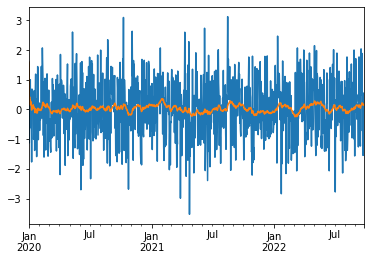

In [57]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range(start="2020-01-01", periods=1000, freq="D"))
ts.plot()
ts.ewm(span=60, min_periods=0, adjust=True).mean().plot()

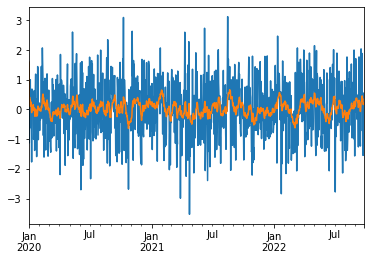

In [78]:
ts.plot()
ts.ewm(alpha=0.1, min_periods=0, adjust=True).mean().plot()

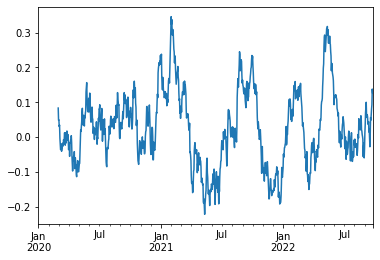

In [58]:
ts.rolling(window=60).mean().plot()

## Self-Correlation, Self-Explanation and Self-Prediction

### Autocorrelation Function

Used to help identify possible structure in time series data. Helps to find structure in what may seem like chaos to the naked eye. Gives a sense of how different points in time relate to each other in a way explained by temporal distance. You process data point by data point and compute how strongly it correlates with the data point behind it. So the first data point should have a correlation of 1 (as it correlates maximally with itself). You can also look at different lags (day 2 to day 3 and day 2 to day 4, day 3 to day 4 and day 3 to day 5, and so on). 

### Partial autocorrelation function

Note that correlations can occur repeatedly. For example, a phenomenon that occurs every Monday will have strong auto-correlation at seven days and at 14 days and at 21 days and so on. A partial autocorrelation function will only consider the shorter interval and not recycle the same autocorrelation repeatedly.

In [81]:
plt.rcParams["figure.figsize"] = (10, 6)
from statsmodels.tsa import stattools

In [ ]:
f = pd.read_csv("data/")

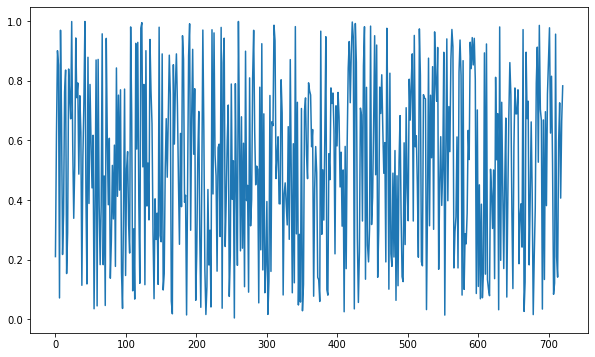

In [85]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
result_curve = noise
plt.plot(grid, result_curve)

No strong autocorrelation is detected in random data (good). The dashed lines indicate the region of the 95% confidence interval around a correlation value of 0.

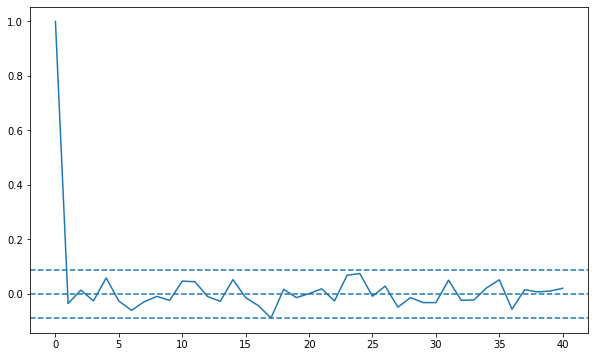

In [90]:
acf_result = stattools.acf(result_curve)
plt.plot(acf_result)
plt.axhline(y=0, linestyle="--")
plt.axhline(y=-1.96/np.sqrt(len(result_curve)), linestyle="dashed")
plt.axhline(y=1.96/np.sqrt(len(result_curve)), linestyle="dashed")

Autocorrelation of a periodic function. The partial autocorrelation leads to the correlation echoing out over time.

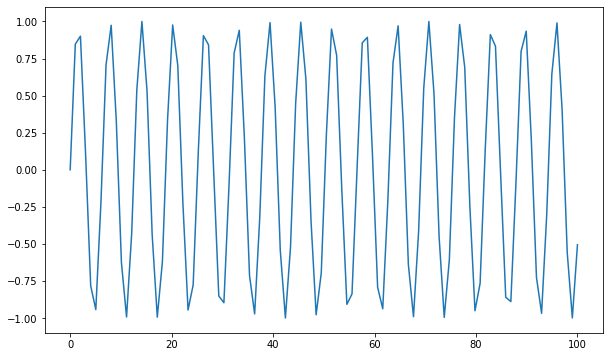

In [93]:
grid = np.linspace(0, 100, 100)
sin5 = np.sin(grid)
result_curve = sin5
plt.plot(grid, result_curve)

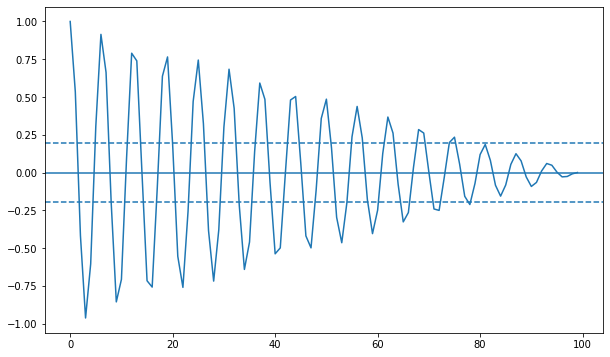

In [94]:
acf_result = stattools.acf(result_curve, nlags=100)
plt.plot(acf_result)
plt.axhline(y=0, linestyle="solid")
plt.axhline(y=-1.96/np.sqrt(len(result_curve)), linestyle="dashed")
plt.axhline(y=1.96/np.sqrt(len(result_curve)), linestyle="dashed")

Another example where applying autocorrelation can be useful:

In [112]:
air_passengers = pd.read_csv("data/AirPassengers.csv", header=0, names=["Month", "Passengers"], parse_dates=["Month"], index_col="Month")

In [113]:
air_passengers.sample(5)

,Passengers
Month,
1949-06-01,135
1958-03-01,362
1951-06-01,178
1953-09-01,237
1954-09-01,259


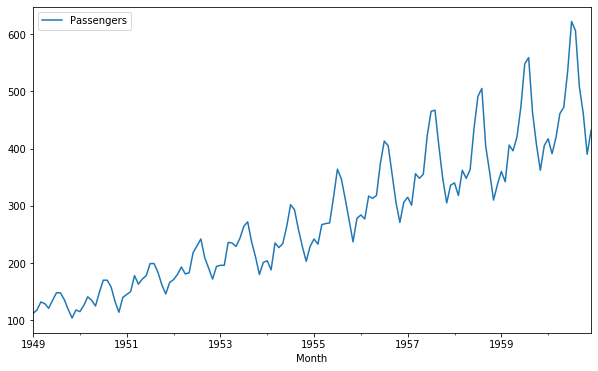

In [114]:
air_passengers.plot()

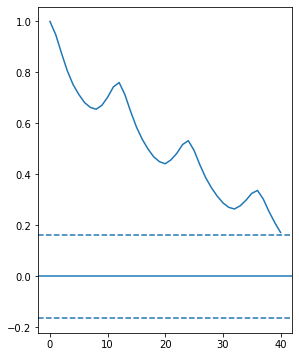

In [123]:
acf_result = stattools.acf(air_passengers.Passengers)
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y=0, linestyle="solid")
plt.axhline(y=-1.96/np.sqrt(len(air_passengers)), linestyle="dashed")
plt.axhline(y=1.96/np.sqrt(len(air_passengers)), linestyle="dashed")

The plot of the autocorrelation values shows that there is a trend present in the original function, but it also shows the recurring structure in the signal.

**Removing trends from time series data**
We try to de-trend the data by taking the log and taking the differences to its shifted representation (trying to make time series more stationary in terms of variance and mean), which makes the signal look as follows.

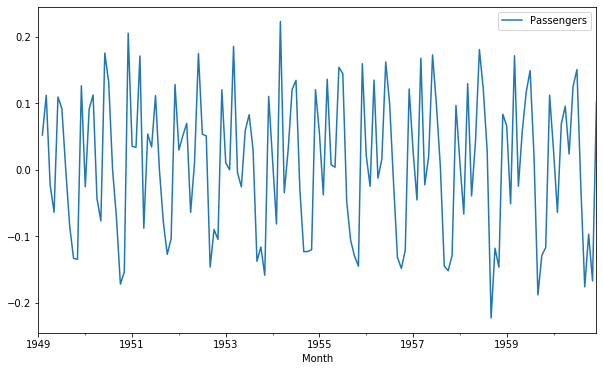

In [119]:
log_air_passengers = np.log(air_passengers)
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.plot()

Now we can compute the autocorrelation on this de-trended signal.

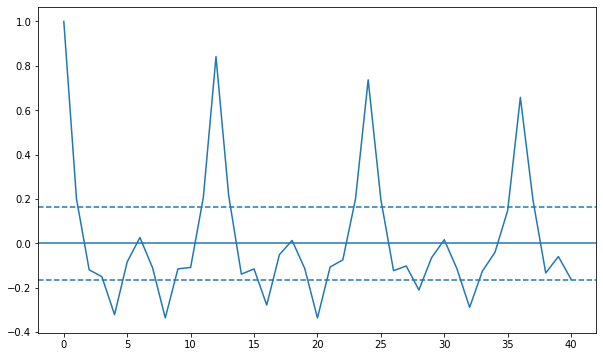

In [128]:
log_air_passengers_diff = log_air_passengers_diff
log_air_passengers_diff.dropna(inplace=True)
acf_result = stattools.acf(log_air_passengers_diff)
#plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y=0, linestyle="solid")
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)), linestyle="dashed")
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)), linestyle="dashed")

The x-axis represents the lag between data points for which the autocorrelation is measured. The high correlation at 12 and 24 and 36 is representative of year-to-year periodicity.

## Pre-Prediction Munging & Stationarity

In order to use ARIMA to predict time series values, you need a stationary time series signal, which most real-world time series do not tend to be. A stationary time series has a constant mean, a constant variance and a constant autocorrelation. The value is not drifting over time. The variance in value is not drifting over time. The structure is not changing over time.

You need to remove the trend and seasonal elements before forecasting.

Things to do in order to make a time series more stationary. 

Dealing with trends:

* Differencing. 
* Use local smoothing (by using some kind of moving average) or a linear regression.

Dealing with seasonality:

May encounter additive or multiplicative seasonality.

* Average de-trended values for specific season.
* Use locally weighted scatterplot smoothing (loess). 

The above are all one-to-one transformations. You can always go back to the original signal.

Test that the transformed signal is indeed stationary by using a Dickey-Fuller test. Test null hypothesis that unit root is present in an autoregressive model.



## Forecasting

### Moving Average Process

Mean and error term carried forward.

### Autoregressive Process

The past values have something to do with present values.

### ARIMA Model (Box-Jenkins)

* AR --> autoregressive terms
* I --> differencing
* MA --> moving average

ARIMA models are the most general class of models for forecasting a time series which can be made to be stationary. Assumptions:

* Statistical properties (mean, variance) constant over time
* Short-term random time patterns always look the same in a statistical sense
* Autocorrelation function and power spectrum remain constant over time
* It is okay to perform non-linear transformations to make the time series stationary
* ARIMA model can be viewed as a combination of signal and noise
* Extrapolate the signal to obtain forecasts

Need to determine which ARIMA model to use on your data. Use plot of the data, the autocorrelation function (for AR model diagnostics) and the partial autocorrelation function (for MA model diagnostics). With plot of data, look for trend (linear or otherwise) and determine whether to transform data. Most software will use maximum likelihood estimation to determine appropriate ARIMA parameters.

The more into the future you are trying to forecast into, the greater your error is going to be. 


In [4]:
from statsmodels.tsa.stattools import acf, pacf

Creating an AR-1 and AR-2 process:

In [5]:
def ar1(phi=0.9, n=1000, init=0):
    time_series = [init]
    error = np.random.randn(n)
    for period in range(n):
        time_series.append(error[period] + phi * time_series[-1])
    return pd.Series(time_series[1:], index=range(n))

def ar2(phi1=0.9, phi2=-0.8, n=1000, init=0):
    time_series = [init, init]
    error = np.random.randn(n)
    for period in range(2, n):
        time_series.append(error[period] + phi1 * time_series[-1] + phi2 * time_series[-2])
    return pd.Series(time_series[1:], index=range(1, n))

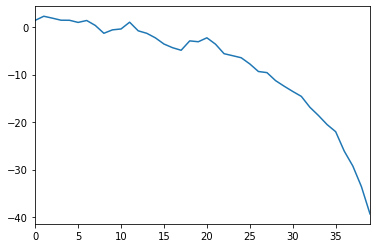

In [30]:
# can play with the parameters to see their effect, but bear in mind that generating new random numbers on each 
# invocation
a1 = ar1(phi=1.1, n=40)
a1.plot()

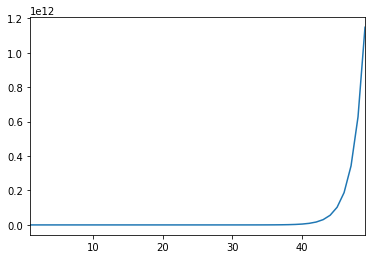

In [29]:
a2 = ar2(n=50, phi2=1.7)
a2.plot()

Creating a moving average process:

In [33]:
def ma1(theta=0.5, n=100):
    time_series = []
    error = np.random.randn(n)
    for period in range(1,n):
        time_series.append(error[period] + theta * error[period - 1])
    return pd.Series(time_series[1:], index=range(1, n - 1))

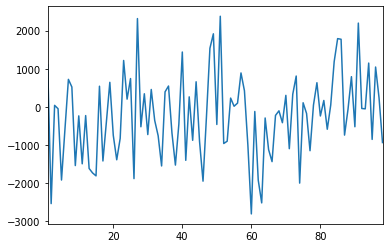

In [34]:
m1 = ma1(theta=-1000)
m1.plot()

What do ACF and PACF look like for each type of process?

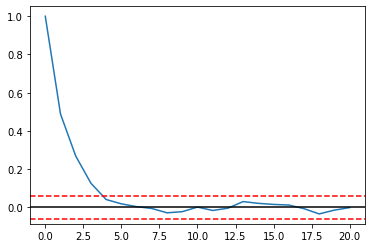

In [40]:
a1 = ar1(phi=0.5, n=1000)
a1_acf = acf(a1, nlags=20)
plt.plot(a1_acf)
plt.axhline(y=0, linestyle="solid", color="black")
plt.axhline(y=-1.96/np.sqrt(len(a1)), linestyle="dashed", color="red")
plt.axhline(y=1.96/np.sqrt(len(a1)), linestyle="dashed", color="red")

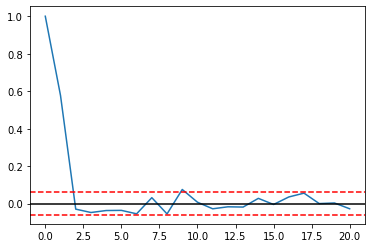

In [41]:
a1 = ar1(phi=0.5, n=1000)
a1_pacf = pacf(a1, nlags=20)
plt.plot(a1_pacf)
plt.axhline(y=0, linestyle="solid", color="black")
plt.axhline(y=-1.96/np.sqrt(len(a1)), linestyle="dashed", color="red")
plt.axhline(y=1.96/np.sqrt(len(a1)), linestyle="dashed", color="red")

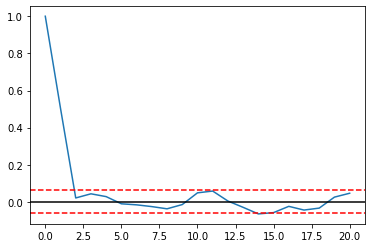

In [43]:
m1 = ma1(n=1000, theta=0.9)
m1_acf = acf(m1, nlags=20)
plt.plot(m1_acf)
plt.axhline(y=0, linestyle="solid", color="black")
plt.axhline(y=-1.96/np.sqrt(len(m1)), linestyle="dashed", color="red")
plt.axhline(y=1.96/np.sqrt(len(m1)), linestyle="dashed", color="red")

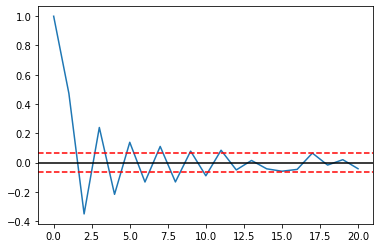

In [44]:
m1 = ma1(n=1000, theta=0.9)
m1_pacf = pacf(m1, nlags=20)
plt.plot(m1_pacf)
plt.axhline(y=0, linestyle="solid", color="black")
plt.axhline(y=-1.96/np.sqrt(len(m1)), linestyle="dashed", color="red")
plt.axhline(y=1.96/np.sqrt(len(m1)), linestyle="dashed", color="red")

### End-to-end example of forecasting

Detrend timeseries:

In [45]:
air_passengers = pd.read_csv("data/AirPassengers.csv", header=0, names=["Month", "Passengers"], parse_dates=["Month"], index_col="Month")

In [46]:
log_air_passengers = np.log(air_passengers.Passengers)

In [47]:
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()

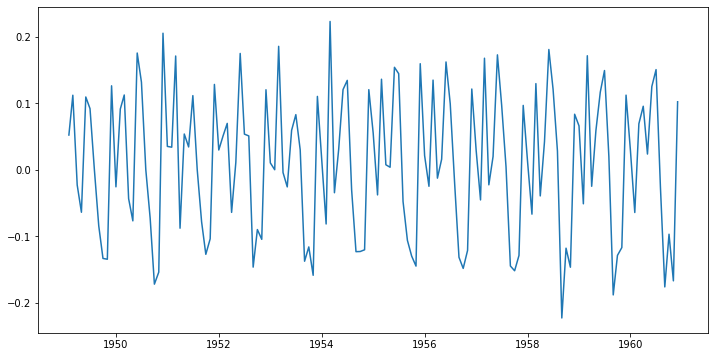

In [53]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(log_air_passengers_diff)

For ARIMA, you do not look at the absolute number just the mean around 0.

Next, you would need to run a test to determine if you transformed signal is not stationary. This one would turn out not to be according to AD-Fuller test.

In [90]:
from statsmodels.tsa.stattools import acf, pacf

In [93]:
log_air_passengers_diff.dropna(inplace=True)
lag_acf = acf(log_air_passengers_diff.values, nlags=20)
lag_pacf = pacf(log_air_passengers_diff.values, nlags=20)

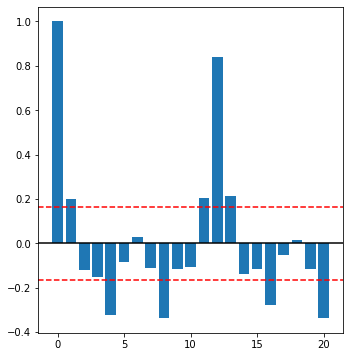

In [95]:
plt.subplot(121)
plt.bar(x=range(len(lag_acf)), height=lag_acf)
plt.axhline(y=0, linestyle="solid", color="black")
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)), linestyle="dashed", color="red")
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)), linestyle="dashed", color="red")

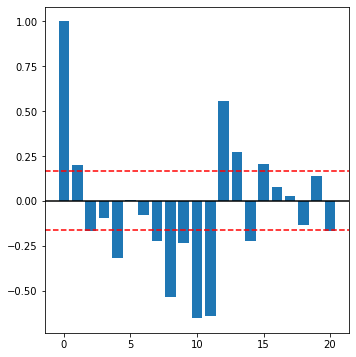

In [96]:
plt.subplot(121)
plt.bar(x=range(len(lag_pacf)), height=lag_pacf)
plt.axhline(y=0, linestyle="solid", color="black")
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)), linestyle="dashed", color="red")
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)), linestyle="dashed", color="red")

In [97]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5, 1.0, 'RSS (sum of squared errors): 1.5023')

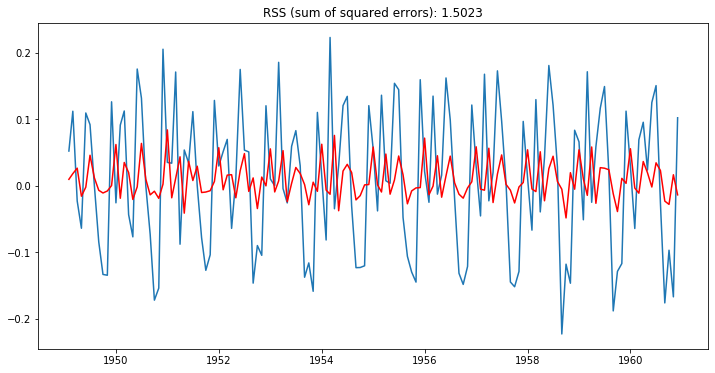

In [101]:
 # AR model
 # try different values of p
 # order = (p, d, q)
 model = ARIMA(log_air_passengers, order=(2, 1, 0))
 results_AR = model.fit(disp=-1)
 plt.plot(log_air_passengers_diff)
 plt.plot(results_AR.fittedvalues, color="red")
 plt.title("RSS (sum of squared errors): %.4f"% sum((results_AR.fittedvalues - log_air_passengers_diff)**2))

Text(0.5, 1.0, 'RSS (sum of squared errors): 1.5245')

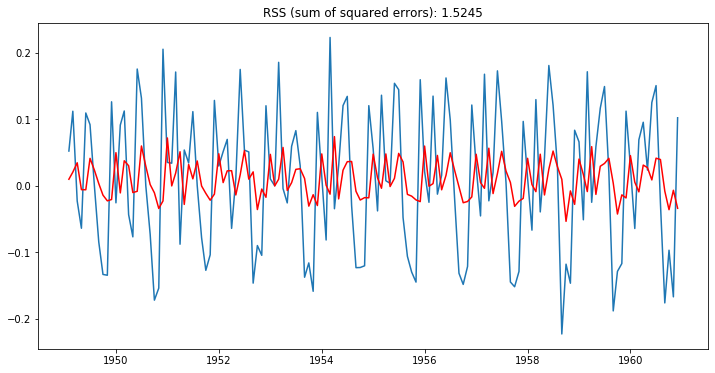

In [102]:
# MA model
# try different values of q
model = ARIMA(log_air_passengers, order=(0, 1, 1))
results_MA = model.fit(disp=-1)
plt.plot(log_air_passengers_diff)
plt.plot(results_MA.fittedvalues, color="red")
plt.title("RSS (sum of squared errors): %.4f"% sum((results_MA.fittedvalues - log_air_passengers_diff)**2))

Text(0.5, 1.0, 'RSS (sum of squared errors): 1.4597')

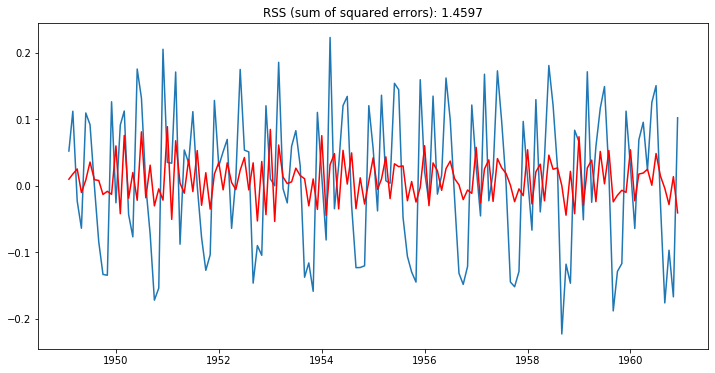

In [105]:
# ARIMA model 
# try p = 1 or 2
model = ARIMA(log_air_passengers, order=(1, 1, 1))
results_ARIMA = model.fit(disp=-1)
plt.plot(log_air_passengers_diff)
plt.plot(results_ARIMA.fittedvalues, color="red")
plt.title("RSS (sum of squared errors): %.4f"% sum((results_ARIMA.fittedvalues - log_air_passengers_diff)**2))

Not great in terms of error, but for illustrative purposes she goes ahead and tries to fit this model to the data.

In [106]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009800
1949-03-01    0.017618
1949-04-01    0.025229
1949-05-01   -0.010225
1949-06-01    0.008528
dtype: float64


In [108]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009800
1949-03-01    0.027418
1949-04-01    0.052648
1949-05-01    0.042422
1949-06-01    0.050950
dtype: float64


In [109]:
predictions_ARIMA_log = pd.Series(log_air_passengers.iloc[0], index=log_air_passengers.index)

In [112]:
predictions_ARIMA_log = pd.Series(log_air_passengers.ix[0], index=log_air_passengers.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728299
1949-03-01    4.745917
1949-04-01    4.771146
1949-05-01    4.760921
dtype: float64

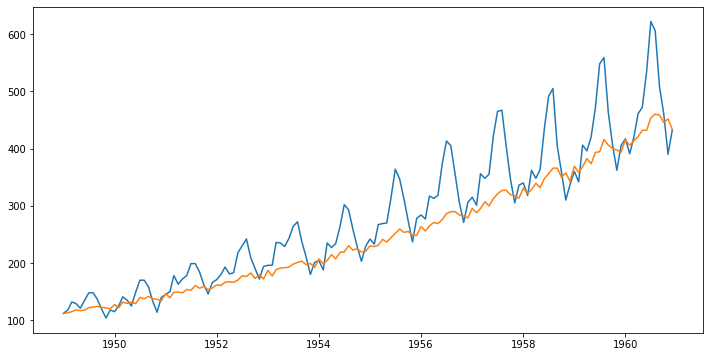

In [113]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(air_passengers)
plt.plot(predictions_ARIMA)

The forecast does well accounting for the trend, but does not really take into account the multiplicative seasonality as you would expect of a basic ARIMA model. You would need to look into seasonal differencing and seasonal ARIMA models. ARIMA can be combined with other models.

## Clustering and Classification of Time Series

Related time series to each other. For this, we need to think about suitable distance metrics. Euclidean Distance is not suitable for comparing time series. A distance function that seems to work well is `Dynamic Time Warping (DTW)`. Can use this for clustering and nearest-neighboring classification of time series.

In [117]:
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import pairwise_distances
from math import sqrt
from scipy.spatial.distance import squareform

In [118]:
words = pd.read_csv("data/50words_TEST.csv", index_col=0, header=None)

Frequency of different spoken words over time. Each time series signal tracks the frequency of a particular word over time.

In [119]:
words.index

Int64Index([ 4, 12, 13, 23,  4, 13, 27,  1, 22,  1,
            ...
            21,  1,  8, 43,  2, 11,  4, 25, 15, 16],
           dtype='int64', name=0, length=455)

Some of the words on average:

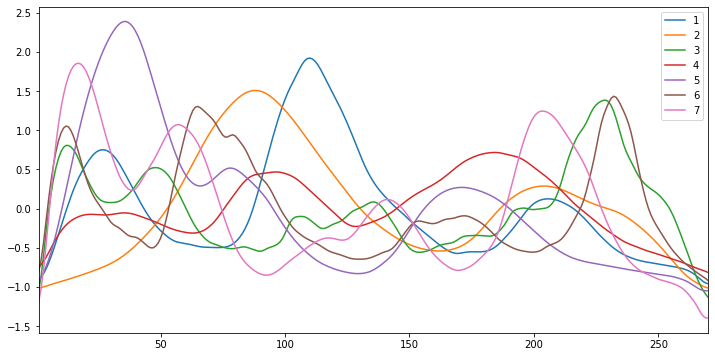

In [123]:
for i in range(7):
    row = words.groupby(words.index).mean().iloc[i]
    row.plot(legend=True)

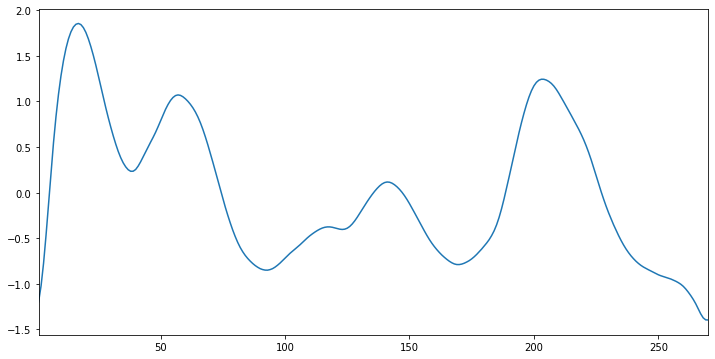

In [124]:
word_type = 7
row = words.groupby(words.index).mean().iloc[word_type -1]
row.plot()

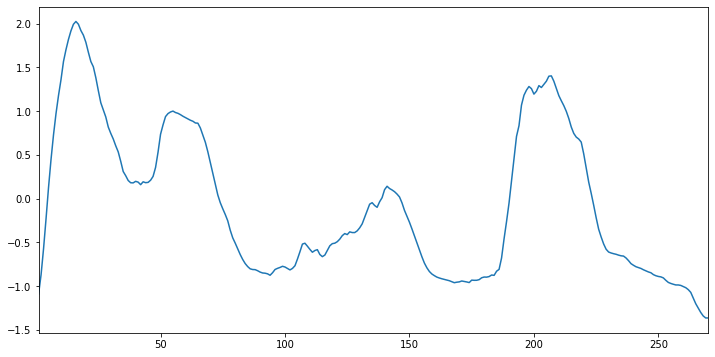

In [125]:
word_type = 7
row = words.groupby(words.index).median().iloc[word_type -1]
row.plot()

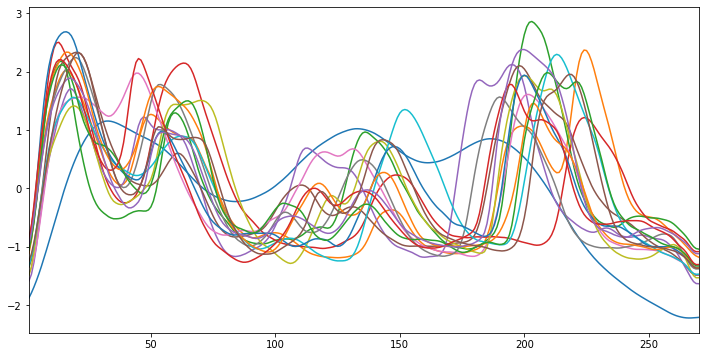

In [127]:
for i in range(words[words.index == word_type].shape[0]):
    row = words[words.index == word_type].iloc[i]
    row.plot()

Code up a sensible distance function to describe the distance between two time series.

In [128]:
#courtesy https://en.wikipedia.org/wiki/Dynamic_time_warping

def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])


In [130]:
# randomly pick two works and compare their distance
chosen_words = words[words.index == word_type]
s1 = chosen_words.iloc[2]
s2 = chosen_words.iloc[3]
print(type(s1))
DTWDistance(s1.values, s2.values)

<class 'pandas.core.series.Series'>


6.58261365073929

In [131]:
s3 = words.iloc[0]
DTWDistance(s1.values, s3.values)

11.099002878491204

In [132]:
s3 = words.iloc[0]
DTWDistance(s2.values, s3.values)

10.501580760094857

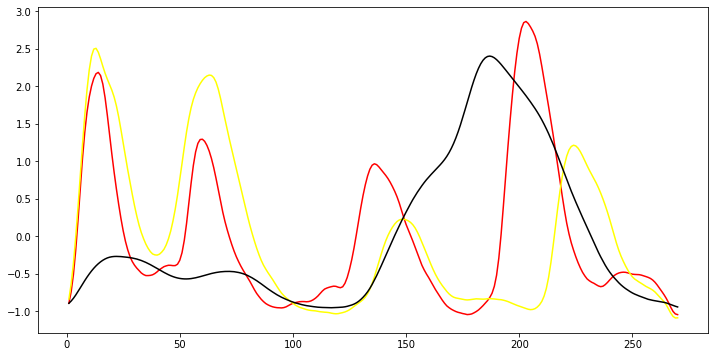

In [136]:
plt.plot(s1, color="red")
plt.plot(s2, color="yellow")
plt.plot(s3, color="black")

Classify a random row by determining which 'mean' curve it is closest to?

In [139]:
mean_curve = {}
for j in range(1, len(set(words.index))):
    row = words[words.index == j].mean()
    mean_curve[j] = row

In [147]:
test_word = words[words.index == 5].iloc[3]

In [150]:
distance_dict = {key:DTWDistance(test_word.values, value.values) for (key, value) in mean_curve.items()}

In [153]:
from collections import OrderedDict

OrderedDict(sorted(distance_dict.items(), key=lambda t: t[1]))

OrderedDict([(5, 2.68952724954025),
             (36, 2.8878966720639534),
             (35, 3.467046235995979),
             (38, 3.6064340426661645),
             (48, 3.7234458010406284),
             (25, 4.075514628199793),
             (14, 4.170465768109789),
             (8, 4.428183577285198),
             (9, 4.489727326521801),
             (37, 4.78100620324337),
             (13, 5.239702657123012),
             (31, 5.269257785249095),
             (45, 5.282412943466398),
             (7, 5.445652705085615),
             (46, 5.451154363898073),
             (43, 5.736154336644988),
             (18, 5.988608301536583),
             (16, 6.069219747917399),
             (42, 6.150753727910193),
             (30, 6.262980729557737),
             (2, 6.269758618088714),
             (34, 6.279922205725803),
             (1, 6.368138261014714),
             (47, 6.650138176370389),
             (27, 7.039327758279427),
             (19, 7.138976765200627),
             (15,

Can you cluster the words using the DTW metric? You can, but it is computationally expensive. Instead, cluster with features using your domain knowledge. Feature selection is what is typically used in practice. DTW is automatic which is nice, but too expensive. Making what you know about the data often leads to better results. 

I think her recommendation for handling multivariate time series data is to use `vector autoregression`.

When handling live data, use `Kalman Filters` and other signal processing techniques.

`Hidden Markov Models` come in when you are trying to measure the hidden aspects of your time series (e.g., measure level of hormone to infer internal/hidden state of bacterium). 

## Topics without notes

Some topics I did not take notes on.

### Read and handle temporal data from files

Handling reading of data from files with dates. You can tell Pandas which columns in your file (or the resulting `DataFrame`) contain date information and ask it to infer the dates for you. This then allows you to invoke methods on the `DateTimeIndex`. Can be quite convenient. However, if I remember correctly, if you let Pandas infer date formats without specifying a format string, this can become an expensive operation. According to the presentation, sometimes, letting Pandas infer dates may be faster. Need to always test this on the data at hand.

In case of monthly (or any other interval data), you may want to convert the time stamps into periods using `to_period()`.

A useful method I was not aware of is `truncate()`. For example, to remove certain rows from a date-time-indexed `DataFrame`: `ts.truncate(before="2016-10-31", after="2016-12-31")`.